Ref:
    https://himnickson.medium.com/morphological-operations-in-image-processing-cb8045b98fcc

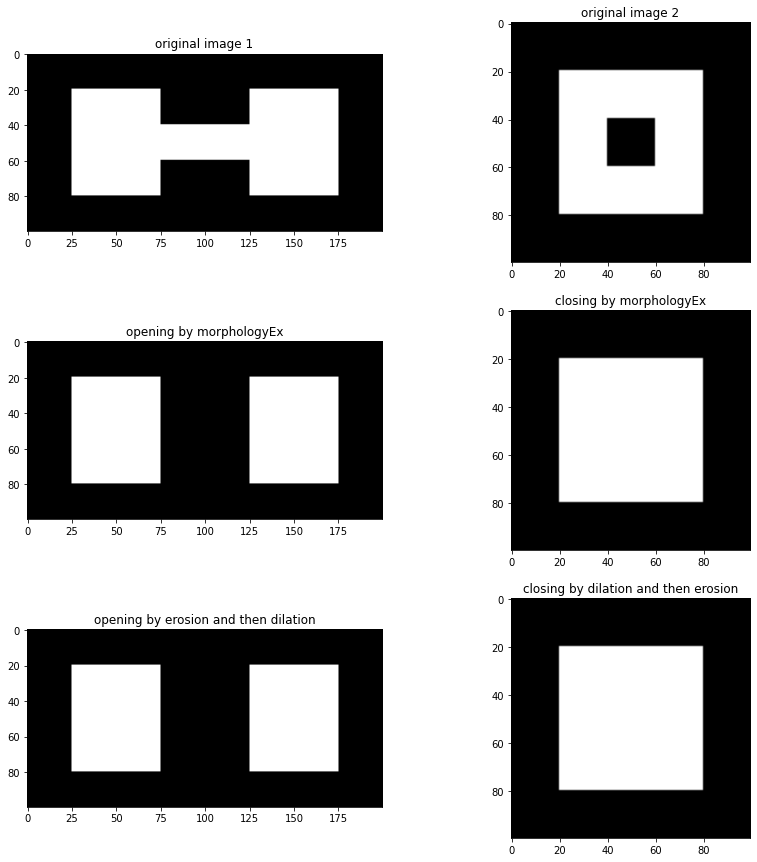

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

H = 100
W = 200
img1 = np.zeros([H,W], dtype=np.uint8)
img1[20:80, 25:75] = 255
img1[20:80, 125:175] = 255
img1[40:60, 75:125] = 255

img2 = np.zeros([H,H], dtype=np.uint8)
img2[20:80, 20:40] = 255
img2[20:40, 40:60] = 255
img2[60:80, 40:60] = 255
img2[20:80, 60:80] = 255

# Define the structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

# Apply the opening operation = erosion + dilation
opening = cv2.morphologyEx(img1, cv2.MORPH_OPEN, kernel, iterations=10)

# Apply erosion followed by dilation to implement opening operation
opening_erosion = cv2.erode(img1, kernel, iterations = 10)
opening_dilation = cv2.dilate(opening_erosion, kernel, iterations = 10)


# Apply the closing operation = dilation + erosion
closing = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel, iterations=10)

# Apply dilation followed by erosion to implement closing operation
closing_dilation = cv2.dilate(img2, kernel, iterations = 10)
closing_erosion = cv2.erode(closing_dilation, kernel, iterations = 10)

row=3
plt.subplot(row,2,1)
plt.title('original image 1')
plt.imshow(img1, cmap ='gray')

plt.subplot(row,2,3)
plt.title('opening by morphologyEx')
plt.imshow(opening, cmap ='gray')

plt.subplot(row,2,5)
plt.title('opening by erosion and then dilation')
plt.imshow(opening_dilation, cmap ='gray')

plt.subplot(row,2,2)
plt.title('original image 2')
plt.imshow(img2, cmap ='gray')

plt.subplot(row,2,4)
plt.title('closing by morphologyEx')
plt.imshow(closing, cmap ='gray')

plt.subplot(row,2,6)
plt.title('closing by dilation and then erosion')
plt.imshow(closing_erosion, cmap ='gray')

plt.gcf().set_size_inches(14, 15)
plt.show()